## **Cournot competetion and the expansion of firms in the economy** 

## Introduction

When studying oligopolies, a type of monopolistic competition is called Cournot competition. In the Cournot model firms compete in quantities of output. 

In this assignment we want to analyze what happens when two firms have an output competition. 
For simplicity, we assume constant marginal cost (MC) for both firms. 

The price is determined by the output produced by the two firms together, via the inverse demand function. They choose their output quantity simultaneously. 

Furthermore we are assuming a linear demand curve. 


**Imports**

In [161]:
import numpy as np
from scipy import optimize
from sympy import solve
import sympy as sm
import matplotlib.pyplot as plt  # This line was missing
from scipy.optimize import minimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model description

In this assignment, we will be analyzing a Cournot duopoly. We assume, that both firms follow a linear demand curve given by: $P = P(Q) = m \cdot (q_1 + q_2) + b$, where m is the parameter for the slope of the price functions and b is the intercept of the price functions.

The costs for the firms are given by: $C_1 = c \cdot q_1$, and $C_2 = c \cdot q_2. $

The profit for the two firms are given by:

$\pi_1 = P \cdot q_1 - C_1 = m \cdot q_1^2 + m \cdot q_1 \cdot q2 - c \cdot q_1 \\$
$\pi_2 = P \cdot q_2 - C_2 = m \cdot q_2^2 + m \cdot q_1 \cdot q2 - c \cdot q_2$


In a cournot duopoly firms want to mazimize profit. The equilibrium is present for $q_1$ and $q_2$ that satisfies the following;

argmax $\pi_1$ wrt. $q_1$, and argmax $\pi_2$ wrt. $q_2$.

If the two equations above are solved for respectively $q_1^*$ and $q_2^*$, we have the best response functions. The best response functions tells us what firm1 and firm2's optimal output will be for every possible output agent 2 can choose. The equilibrium is found by subsituting $q_2^*$ into $q_1^*$ and solving for $q_1^*$, getting the equilibrium output for firm 1. The same is done for firm 2 to find the equilibrium output for firm 2.  

**Defining the model in python**

In [162]:
#Define variables in sympy

p = sm.symbols("p") #Market price
q1 = sm.symbols("q1") #Output firm 1
q2 = sm.symbols("q2") #Output firm 2
c = sm.symbols("c") #Marginal profit
pi1 = sm.symbols("pi1") #Profit for firm 1
pi2 = sm.symbols("pi2") #Profit for firm 2
m = sm.symbols("m") #Parameter for the slope of the price function
b = sm.symbols("b") # Intercept of the price function
C1 = sm.symbols("C1") #Costs for firm 1
C2 = sm.symbols("C2") #Costs for firm 2
P = sm.symbols("P")


#Define profit for firm 1
profit1 =  m*q1**2 + m*q1*q2 + b*q1 - c*q1

#Define profit for firm 2
profit2 =  m*q2**2 + m*q1*q2 + b*q2 - c*q2

display("Profit firm 1 =", profit1)
display("Profit firm 2 =", profit2)

'Profit firm 1 ='

b*q1 - c*q1 + m*q1**2 + m*q1*q2

'Profit firm 2 ='

b*q2 - c*q2 + m*q1*q2 + m*q2**2

**Best Response Functions and a Nash Equilibrium**

In Cournot the equilibrium exists when the two firms' best response functions intersect. Therefore, we find the expressions for the best response functions by taking the FOC of profit for each firm with respect to their output: $\frac{\partial \pi_n}{\partial q_n}$. Following this we find the best response by solving and isolating outputs.

In [163]:
#First order derivative of profit for firm 1 wrt. q1 
objective1 = sm.diff(profit1, q1)

#First order derivative of profit for firm 2 wrt. q2
objective2 = sm.diff(profit2, q2)

#To find the best response functions, we isolate q1* and q2*
BR1 = sm.solve(objective1, q1)[0] 
BR2 = sm.solve(objective2, q2)[0]

display("Best response function for firm 1 =", BR1)
display("Best response function for firm 2 =",BR2)


'Best response function for firm 1 ='

(-b + c - m*q2)/(2*m)

'Best response function for firm 2 ='

(-b + c - m*q1)/(2*m)

A Nash Equilibrium in Cournot exists when both firms use their best reponse function. Graphically, this is where the two best response functions intersect.

To find the equilibirum, we assume we know the values of m, b and c. The equilibrium quantities, profits and price are found below for given values of m, b and c.

In [164]:
# Parameters
m_val, b_val, c_val = 2, 50, 110  # Example values for m, b, c

# Define the profit functions with simple overflow checks
def profit1(q1, q2):
    return -(m_val * q1**2 + m_val * q1 * q2 + b_val * q1 - c_val * q1)


def profit2(q2, q1):
    return -(m_val * q2**2 + m_val * q1 * q2 + b_val * q2 - c_val * q2)
 
# Define the best response functions using numerical optimization
def best_response1(q2):
    result = minimize(lambda q1: profit1(q1, q2), x0=10, bounds=[(0, 50)])
    return result.x[0]

def best_response2(q1):
    result = minimize(lambda q2: profit2(q2, q1), x0=10, bounds=[(0, 50)])
    return result.x[0]

# Define the function to find the equilibrium by minimizing the squared differences
def find_equilibrium(x):
    q1, q2 = x
    br1 = best_response1(q2)
    br2 = best_response2(q1)
    return (q1 - br1)**2 + (q2 - br2)**2


# Initial guess closer to expected reasonable values
initial_guess = [10, 10]  # Assuming 20 is a middle-ground starting point

# Optimization to find the equilibrium
result = minimize(find_equilibrium, initial_guess, bounds=[(0, None), (0, None)])

# Output the equilibrium quantities
q1_equilibrium, q2_equilibrium = result.x

# Find the price at the given parameters with the equilibrium quantities
equib_price = m_val*(q1_equilibrium+q2_equilibrium) + b_val

print("Equilibrium quantities:")
print("q1* =" , q1_equilibrium)
print("q2* =", q2_equilibrium)
#Output the profits
print("Profits:")
print("Profit Firm 1 =", profit1(q1_equilibrium, q2_equilibrium))
print("Profit Firm 2 =", profit2(q1_equilibrium, q2_equilibrium))
#Price at equilibrium
print("Price at equilibrium=", equib_price)

Equilibrium quantities:
q1* = 9.999998196098943
q2* = 9.999998196098943
Profits:
Profit Firm 1 = 200.00003607800818
Profit Firm 2 = 200.00003607800818
Price at equilibrium= 89.99999278439577


**Plotting the equilibrium**

Graphically we can show the equilibrium as the intersect between BR1 and BR2 in the plot below.

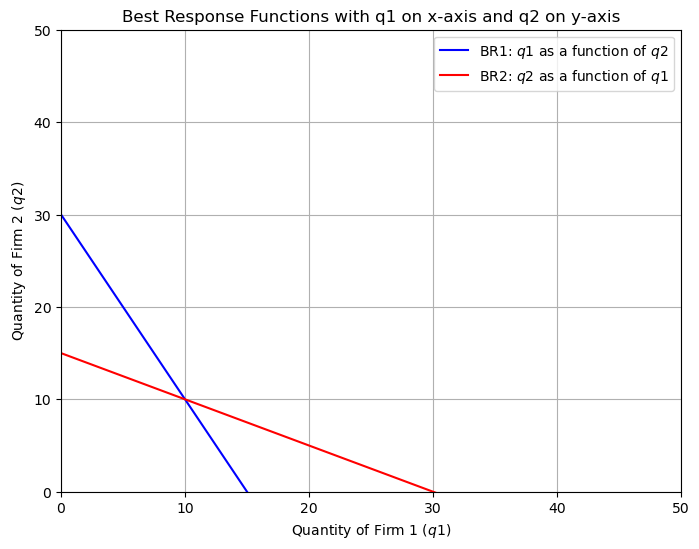

In [165]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt

# Define cost functions
cost1 = sm.Eq(C1, c*q1)  # Costs for firm 1
cost2 = sm.Eq(C2, c*q2)  # Costs for firm 2

# Define price function
price_function = sm.Eq(P, m*(q1+q2) + b)

# Define profit for firm 1
profit1 =  m*q1**2 + m*q1*q2 + b*q1 - c*q1

# Define profit for firm 2
profit2 =  m*q2**2 + m*q1*q2 + b*q2 - c*q2

# Differentiate profits with respect to their quantities
objective1 = sm.diff(profit1, q1)
objective2 = sm.diff(profit2, q2)

# Solve for best response functions
BR1 = sm.solve(objective1, q1)[0] 
BR2 = sm.solve(objective2, q2)[0]

# Parameter values
m_val, b_val, c_val = 2, 50, 110

# Substitute parameter values into the best response functions
BR1_func = sm.lambdify(q2, BR1.subs({m: m_val, b: b_val, c: c_val}))
BR2_func = sm.lambdify(q1, BR2.subs({m: m_val, b: b_val, c: c_val}))

# Generate a range of quantities for plotting
q_range = np.linspace(0, 100, 400)

# Calculate best responses over the range
BR1_values = BR1_func(q_range)  # q1 as a function of q2
BR2_values = BR2_func(q_range)  # q2 as a function of q1

# Plotting
plt.figure(figsize=(8, 6))

# Plot BR within the range [0, 50]
plt.plot(BR1_values, q_range, label='BR1: $q1$ as a function of $q2$', color='blue')  # BR1 as function of q2
plt.plot(q_range, BR2_values, label='BR2: $q2$ as a function of $q1$', color='red')  # BR2 as function of q1
plt.xlabel('Quantity of Firm 1 ($q1$)')
plt.ylabel('Quantity of Firm 2 ($q2$)')
plt.title('Best Response Functions with q1 on x-axis and q2 on y-axis')
plt.legend()
plt.grid(True)
plt.xlim(0, 50)  # Set x-axis limits from 0 to 50
plt.ylim(0, 50)  # Set y-axis limits from 0 to 50
plt.show()


**A model with more firms**

To show what happens to Cournot competition when the competition increases, we solve the following problem below. We assume that all firms have the same cost function, and they all face the same demand. To illustrate what happens, we use the linear example:

The demand function; 

$D(q) = 70 - q $

The cost function:

$c = 10$

Which gives the profit function for firm 1:

$\pi = (70 - q1 - (N-1) \cdot q - 10) \cdot q1$

where N is the number of firms in the market. In this case, we iterate up to 100 firms.

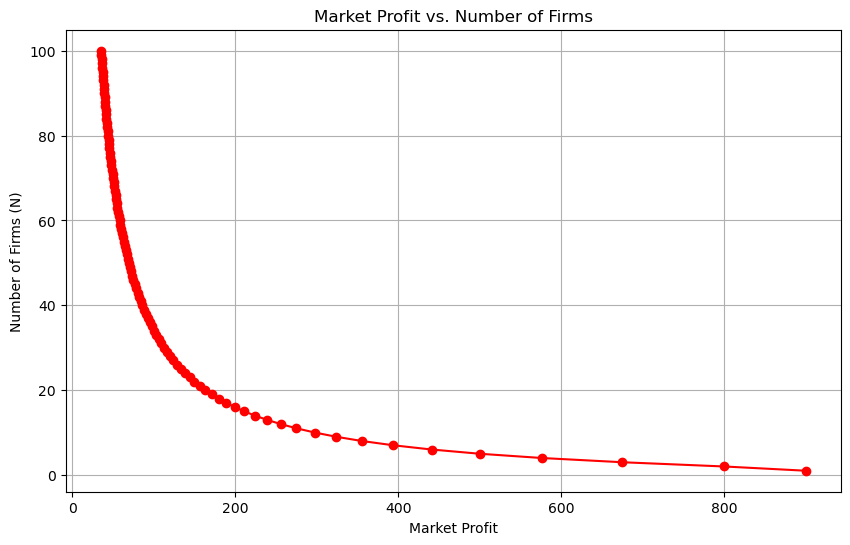

In [166]:
# Define the two new variable; N and q
q = sm.symbols('q')
N = sm.symbols('N')

# Define the profit function for firm 1 in a market with N competitiors
profit1_N_firms = (70 - q1 - (N - 1) * q - 10) * q1

# First order derivative of the profit function with respect to q1
objectiveN = sm.diff(profit1_N_firms, q1)

# Arrays to store data points
N_values = []
market_profits = []

for N_value in range(1, 101):  # Iterate from 1 to 100 firms.
    # Assuming symmetry among firms, solve for q1
    BRN = sm.solve(objectiveN.subs({N: N_value, q: q1}), q1)
    
    if BRN:  # Check if a solution exists
        best_response = BRN[0]
        # Calculate the profit for one firm using its best response
        firm_profit = profit1_N_firms.subs({q1: best_response, q: best_response, N: N_value})
        
        # Aggregate market profit is N * individual firm's profit
        market_profit = N_value * firm_profit
        market_profits.append(market_profit)
        N_values.append(N_value)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(market_profits, N_values, marker='o', linestyle='-', color = "red")
plt.title('Market Profit vs. Number of Firms')
plt.xlabel('Market Profit')
plt.ylabel('Number of Firms (N)')
plt.grid(True)
plt.show()

The graph above shows, the relationship between market profit and the number of firms in a Cournot competition. In the graph it is evident that the market profit decreases as the number of firms increases. This is consistent with our theoretical understanding of an oligopolistic market. As more firms enter the market, competition intensifies, which in turn lowers the price. A lower price lowers the profit per marginal unit sold. In theory, the price will converge to production costs at increased competition. Hence, the profit converges towards 0. This shows, that the market converges towards perfect competition.

Below is a function showing a similar graph as above, however with a cost vector which is normal distributed with 50 values, a mean of 10 and standard deviation of 3. The conclusion is similar as in the graph above. Note: there are only 50 firms and the function takes around 15 seconds to run.

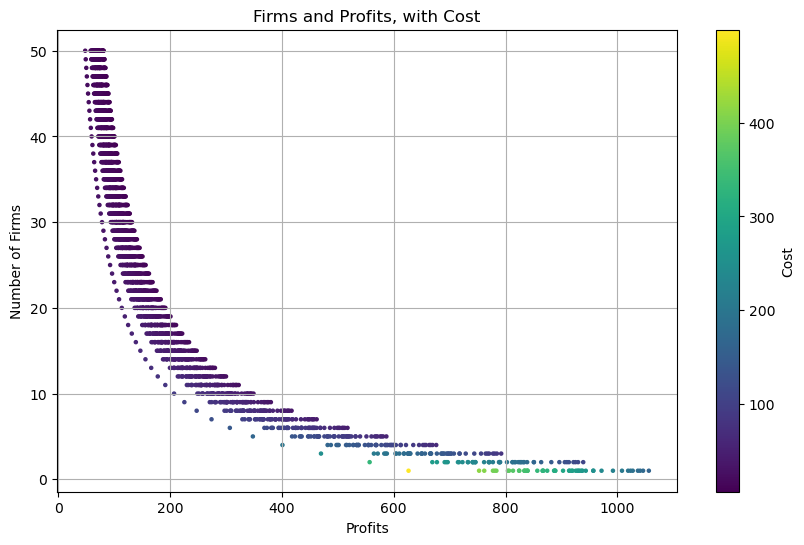

In [167]:
q1 = sm.symbols('q1')
q = sm.symbols('q')
N = sm.symbols('N')
c = sm.symbols('c')

# Define the profit function for firm 1 in a market with N competitors
profit1_N_firms = (70 - q1 - (N - 1) * q - c) * q1

# First order derivative of the profit function with respect to q1
objectiveN = sm.diff(profit1_N_firms, q1)

# Arrays to store data points
N_values = []
market_profits = []
cost_values = []

np.random.seed(50)  # Set seed
c_values = np.random.normal(loc=10, scale=3, size=50)  # Generate 50 values from a normal distribution for the cost

for N_value in range(1, 51):  # Iterate from 1 to 50 firms
    for c_value in c_values:
        # Assuming symmetry among firms, solve for q1
        BRN = sm.solve(objectiveN.subs({N: N_value, q: q1, c: c_value}), q1)
        
        if BRN:  # Check if a solution exists
            best_response = BRN[0]
            # Calculate the profit for one firm using its best response
            firm_profit = profit1_N_firms.subs({q1: best_response, q: best_response, N: N_value, c: c_value})
            # Calculate the cost
            cost_value = c_value * best_response
            
            # Aggregate market profit is N * individual firm's profit
            market_profit = N_value * firm_profit
            market_profits.append(market_profit)
            N_values.append(N_value)
            cost_values.append(cost_value)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(market_profits, N_values, c=cost_values, cmap='viridis', s=5) # mapping the scatter and setting size of points
plt.colorbar(label='Cost')
plt.xlabel('Profits')
plt.ylabel('Number of Firms')
plt.title('Firms and Profits, with Cost')
plt.grid()
plt.show()

## Bertrand Vs Cournot Vs. monopoly


Under cournot competition we saw that the best response function for firm 1 was given as:

$q_1 = \frac{A-x_2-a*c}{2} \\$

$q_2 = \frac{A-x_1-a*c}{2} \\$
which gives the equilibirum; $q_1^* = q_2^* = \frac{A-a*c}{3}$

Under monopoly the total output in the industry is:
$q^* = \frac{A-a*c}{2}$


In the Bertrand competition, two firms compete in price and has identical, constant MC = c. We assume, that the products are homogenous, which means, that the firm with the lowest price, gets all of the demand. The Nash-equilibrium is therefore found, where both firms set price = MC, and no profit is earned. 

We assume, that the consumer demand is given by the function:

$x = A - \alpha * p$

Since both firms sets the price equal to the marginal cost, the total output under Bertrand competition is:

$x = A - \alpha * c$

Assuming each of the two firms produces half of the total output:

$x_{1}^B = x_{2}^B = \frac{A-\alpha*c}{2}$ with the Bertrand price: $p^B = c$

Thus, $X_{cournot} = \frac{4}{3} * $




**Comparing cost and quantity in the three economies**

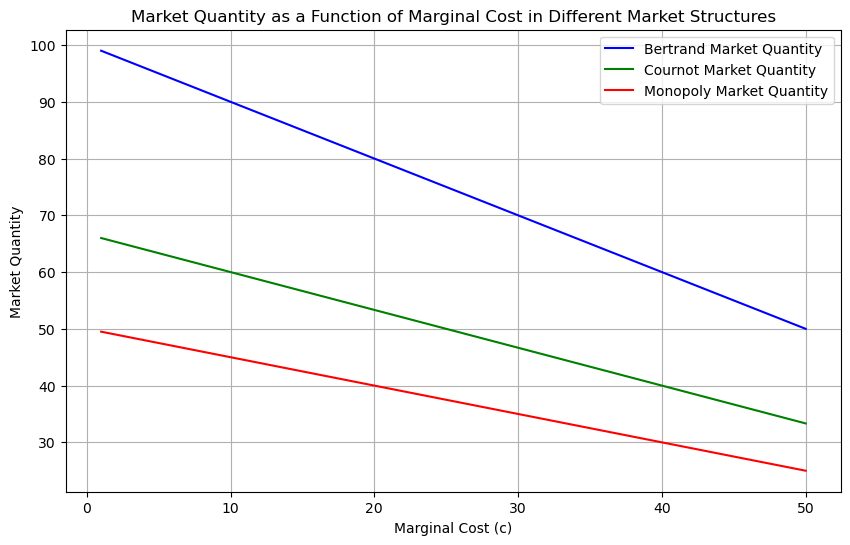

In [168]:
# Define constants
A = 100  # Total market size, adjust as necessary
alpha = 1  # Price sensitivity of demand
c = 20   # Initial marginal cost, adjust as necessary



#The market quantity in Bertrand:

market_quantity_bertrand = 2*(A - alpha * c)/2

#The market quantity in Cournot
market_quantity_cournot = 2*(A-alpha*c)/3


#The market quantity in monopoly
market_quantity_monopoly = (A-alpha*c)/2


# Define the range for the marginal cost c
c_range = np.linspace(1, 50, 100)

# Define the market quantities as functions of c for Bertrand, Cournot, and Monopoly scenarios
market_quantity_bertrand_func = A - alpha * c_range
market_quantity_cournot_func = 2 * (A - alpha * c_range) / 3
market_quantity_monopoly_func = (A - alpha * c_range) / 2

# Plotting the market quantities as functions of marginal cost c
plt.figure(figsize=(10, 6))
plt.plot(c_range, market_quantity_bertrand_func, label='Bertrand Market Quantity', color='blue')
plt.plot(c_range, market_quantity_cournot_func, label='Cournot Market Quantity', color='green')
plt.plot(c_range, market_quantity_monopoly_func, label='Monopoly Market Quantity', color='red')

# Labels and legend
plt.title('Market Quantity as a Function of Marginal Cost in Different Market Structures')
plt.xlabel('Marginal Cost (c)')
plt.ylabel('Market Quantity')
plt.legend()
plt.grid(True)
plt.show()

The graph above shows, the difference between a market with Bertran, Cournot and Monopoly competition. From the graph we can see that in a Bertrand competition, the market quantity is twice the size as in a monopoly market. And we get the relationship; $X^B > X^C > X^M$.

Futhermore we notice, that the market quantity decreases as the marginal cost increases. 


## Conclusion